In [3]:
import nolds
import os
import librosa
import pandas as pd
import numpy as np
from my_functions import *


np.random.seed(0)

ravdess_path = r'Ravdess/audio_speech_actors_01-24'
emotions = ['Neutral', 'Calm', 'Happy', 'Sad', 'Angry', 'Fearful', 'Disgust', 'Surprised']
intensities = ['Normal', 'Strong']
statements = ['Kids are talking by the door', 'Dogs are sitting by the door']
sr = 22050

In [4]:
records_df = pd.DataFrame(columns=['Actor', 'Sex', 'Emotion', 'Intensity', 'Statement', 'Reps', 'File', 'No. Samples'])
samples_length = []

for i in range(1, 25):
	actor = f'Actor_{i:02}'
	actor_path = fr'{ravdess_path}\{actor}'

	if i%2 != 0:
		sex = 'Man'
	else:
		sex = 'Woman'

	# Cada actor tiene 60 grabaciones
	cont = 0
	for recording in os.listdir(actor_path):
		emotion_index = get_feature_ravdess(recording, 3) - 1
		intensity_index = get_feature_ravdess(recording, 4) - 1
		statement_index = get_feature_ravdess(recording, 5) - 1
		repetition = get_feature_ravdess(recording, 6)

		records_df.loc[60*(i-1) + cont] = [actor, sex, emotions[emotion_index], intensities[intensity_index], 
									 statements[statement_index], repetition, recording, len(get_audio_record_ravdess(recording, True)[0])]

		cont += 1

records_df['Duration'] = records_df['No. Samples'] / sr
records_df

,Actor,Sex,Emotion,Intensity,Statement,Reps,File,No. Samples,Duration
0,Actor_01,Man,Neutral,Normal,Kids are talking by the door,1,03-01-01-01-01-01-01.wav,72838,3.303311
1,Actor_01,Man,Neutral,Normal,Kids are talking by the door,2,03-01-01-01-01-02-01.wav,73574,3.336689
2,Actor_01,Man,Neutral,Normal,Dogs are sitting by the door,1,03-01-01-01-02-01-01.wav,72102,3.269932
3,Actor_01,Man,Neutral,Normal,Dogs are sitting by the door,2,03-01-01-01-02-02-01.wav,69895,3.169841
4,Actor_01,Man,Calm,Normal,Kids are talking by the door,1,03-01-02-01-01-01-01.wav,77988,3.536871
...,...,...,...,...,...,...,...,...,...
1435,Actor_24,Woman,Surprised,Normal,Dogs are sitting by the door,2,03-01-08-01-02-02-24.wav,75045,3.403401
1436,Actor_24,Woman,Surprised,Strong,Kids are talking by the door,1,03-01-08-02-01-01-24.wav,86817,3.937279
1437,Actor_24,Woman,Surprised,Strong,Kids are talking by the door,2,03-01-08-02-01-02-24.wav,87553,3.970658
1438,Actor_24,Woman,Surprised,Strong,Dogs are sitting by the door,1,03-01-08-02-02-01-24.wav,80931,3.670340


In [3]:
# Guardar el df con todos los archivos como csv
records_df.to_csv('data.csv', sep=';')

## Sub_df

In [5]:
sub_df = records_df.loc[(records_df['Actor'] == 'Actor_03') # Actor_03 solo de prueba
					   & (records_df['Emotion'] == 'Angry')
					   & (records_df['Intensity'] == 'Strong')]

files = sub_df['File'].to_numpy()
files

array(['03-01-05-02-01-01-03.wav', '03-01-05-02-01-02-03.wav',
       '03-01-05-02-02-01-03.wav', '03-01-05-02-02-02-03.wav'],
      dtype=object)

In [7]:
sub_df['Sample Entropy'] = calc_sampen(files, 8, True)[0]
sub_df['Correlation Dimension'] = calc_corr_dim(files, 8, True)[0]
sub_df['Lyapunov Exponent Rosenstein'] = calc_lyap_r(files, 8, True)[0]
sub_df['Detrented Fluctuation Analysis'] = calc_dfa(files, 8, True)[0]
sub_df['Hurst Exponent'] = calc_hurst_rs(files, 8, True)[0]

lyap_e =  calc_lyap_e(files, 8, True)[0]  # Se hace para aprovechar las ventajas de indexación de numpy
sub_df['1st Lyapunov Exponent'] = lyap_e[:, 0]
sub_df['2nd Lyapunov Exponent'] = lyap_e[:, 1]
sub_df['3rd Lyapunov Exponent'] = lyap_e[:, 2]
sub_df['4th Lyapunov Exponent'] = lyap_e[:, 3]

# sub_df.to_csv('example_file.csv', sep=';')

C:\Users\JuanD\AppData\Local\Temp\ipykernel_10688\1749487757.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df['Sample Entropy'] = calc_sampen(files, 8, True)[0]
C:\Users\JuanD\AppData\Local\Temp\ipykernel_10688\1749487757.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df['Correlation Dimension'] = calc_corr_dim(files, 8, True)[0]
C:\Users\JuanD\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\nolds\measures.py:242:

In [12]:
lyap_e

array([[ 0.14976548,  0.04837184, -0.05081804, -0.22827989],
       [ 0.2028529 ,  0.06916251, -0.04583837, -0.24034834],
       [ 0.10759235,  0.02692107, -0.05481137, -0.21951789],
       [ 0.2459678 ,  0.08136671, -0.04572332, -0.24744439]],
      dtype=float32)

In [6]:
sub_df

,Actor,Sex,Emotion,Intensity,Statement,Reps,File,Correlation Dimension
152,Actor_03,Man,Angry,Strong,Kids are talking by the door,1,03-01-05-02-01-01-03.wav,2.596814
153,Actor_03,Man,Angry,Strong,Kids are talking by the door,2,03-01-05-02-01-02-03.wav,2.138573
154,Actor_03,Man,Angry,Strong,Dogs are sitting by the door,1,03-01-05-02-02-01-03.wav,1.798370
155,Actor_03,Man,Angry,Strong,Dogs are sitting by the door,2,03-01-05-02-02-02-03.wav,0.996994


## Cambios Df

In [4]:
files = records_df['File'].to_numpy()

records_df['Sample Entropy'] = calc_sampen(files)
records_df['Correlation Dimension'] = calc_corr_dim(files)
# records_df['Lyapunov Exponent Rosenstein'] = calc_lyap_r(files)
records_df['Detrented Fluctuation Analysis'] = calc_dfa(files)
records_df['Hurst Exponent'] = calc_hurst_rs(files)

lyap_e =  np.array([list(exponents) for exponents in calc_lyap_e(files, 8)]) # Se hace para aprovechar las ventajas de indexación de numpy
records_df['1st Lyapunov Exponent'] = lyap_e[:, 0]
records_df['2nd Lyapunov Exponent'] = lyap_e[:, 1]
records_df['3rd Lyapunov Exponent'] = lyap_e[:, 2]
records_df['4th Lyapunov Exponent'] = lyap_e[:, 3]

records_df.to_csv('data_changed.csv', sep=';')

C:\Users\JuanD\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\nolds\measures.py:783: RuntimeWarning: overflow encountered in scalar add
  counts[-1] += np.sum(dsts < tolerance)
C:\Users\JuanD\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\nolds\measures.py:788: RuntimeWarning: invalid value encountered in log
  saen = -np.log(1.0 * counts[1] / counts[0])


In [ ]:
lyap_e =  np.array([list(exponents) for exponents in calc_lyap_e(files)]) # Se hace para aprovechar las ventajas de indexación de numpy
records_df['1st Lyapunov Exponent'] = lyap_e[:, 0]
records_df['2nd Lyapunov Exponent'] = lyap_e[:, 1]
records_df['3rd Lyapunov Exponent'] = lyap_e[:, 2]
records_df['4th Lyapunov Exponent'] = lyap_e[:, 3]
  
records_df.to_csv('data_changed.csv', sep=';')

# Configurar el nivel de aleatoriedad en las funciones de nolds

In [2]:
actor_j = 3
y, sr = librosa.load(fr'{ravdess_path}\Actor_{actor_j:02}\03-01-05-02-01-01-{actor_j:02}.wav')

display(y, len(y), len(y)//2)

array([-1.03946499e-04,  3.68481778e-06,  2.72420817e-04, ...,
       -5.76934835e-05, -1.10347006e-04, -1.90979961e-04], dtype=float32)

97117

48558

In [3]:
nolds.corr_dim(y, 14)

MemoryError: Unable to allocate 35.1 GiB for an array with shape (97104, 97104) and data type float32

In [10]:
# Con RANSAC

def test_function(y: np.ndarray) -> np.ndarray:
	iterations = 20

	lyapr_list = np.empty(iterations, dtype='float32')
	lyape_list = np.empty(iterations, dtype=np.ndarray)
	corr_list = np.empty(iterations, dtype='float32')

	n = len(y) // 2
	for i in range(iterations):
		# Se redujo en la mitad para que no salga error y de paso reducir el tiempo, pues solo quiero ver si la funcion cambia cuando se utiliza (como pasa como lyap_r y corr_dim)
		lyapr_list[i] = nolds.lyap_r(y[:n])
		lyape_list[i] = nolds.lyap_e(y[:n])
		corr_list[i] = nolds.corr_dim(y[:n], emb_dim=14)
	
	return lyapr_list, lyape_list, corr_list

a, b, c = test_function(y)

display(a, b, c)

C:\Users\JuanD\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\nolds\measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 12139
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


In [4]:
# Con poly
# Como nolds.lyap_e no presentó cambios en las 20 iteraciones, asumiré que nunca cambiará
def test_function(y: np.ndarray) -> np.ndarray:
	iterations = 20

	lyapr_list = np.empty(iterations, dtype='float32')
	sampen_list = np.empty(iterations, dtype='float32')
	corr_list = np.empty(iterations, dtype='float32')

	n = len(y) // 2
	for i in range(iterations):
		lyapr_list[i] = nolds.lyap_r(y[:n], fit='poly')
		sampen_list[i] = nolds.sampen(y[:n])
		corr_list[i] = nolds.corr_dim(y[:n], emb_dim=14, fit='poly')
	
	return lyapr_list, sampen_list, corr_list

a, b, c = test_function(y)

display(a, b, c)

C:\Users\JuanD\AppData\Local\Temp\ipykernel_15260\2224796387.py:3: NumbaWarning: Cannot cache compiled function "test_function" as it uses lifted code
  @numba.jit(forceobj=True, looplift=True, parallel=True, cache=True)
C:\Users\JuanD\AppData\Local\Temp\ipykernel_15260\2224796387.py:3: NumbaWarning: 
Compilation is falling back to object mode WITHOUT looplifting enabled because Function "test_function" failed type inference due to: Unknown attribute 'lyap_r' of type Module(<module 'nolds' from 'C:\\Users\\JuanD\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python311\\site-packages\\nolds\\__init__.py'>)

File "..\..\..\AppData\Local\Temp\ipykernel_15260\2224796387.py", line 13:
<source missing, REPL/exec in use?>

During: typing of get attribute at C:\Users\JuanD\AppData\Local\Temp\ipykernel_15260\2224796387.py (13)

File "..\..\..\AppData\Local\Temp\ipykernel_15260\2224796387.py", line 13:
<source missing, REPL/exec in use?

array([0.02517943, 0.02517943, 0.02517943, 0.02517943, 0.02517943,
       0.02517943, 0.02517943, 0.02517943, 0.02517943, 0.02517943,
       0.02517943, 0.02517943, 0.02517943, 0.02517943, 0.02517943,
       0.02517943, 0.02517943, 0.02517943, 0.02517943, 0.02517943],
      dtype=float32)

array([0.10439863, 0.10439863, 0.10439863, 0.10439863, 0.10439863,
       0.10439863, 0.10439863, 0.10439863, 0.10439863, 0.10439863,
       0.10439863, 0.10439863, 0.10439863, 0.10439863, 0.10439863,
       0.10439863, 0.10439863, 0.10439863, 0.10439863, 0.10439863],
      dtype=float32)

array([0.09444284, 0.09444284, 0.09444284, 0.09444284, 0.09444284,
       0.09444284, 0.09444284, 0.09444284, 0.09444284, 0.09444284,
       0.09444284, 0.09444284, 0.09444284, 0.09444284, 0.09444284,
       0.09444284, 0.09444284, 0.09444284, 0.09444284, 0.09444284],
      dtype=float32)

In [100]:
nolds.lyap_r(y[:len(y)//2])

C:\Users\JuanD\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\nolds\measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 12139
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


0.01954484476589766

In [45]:
nolds.lyap_e(y[:len(y)//2])

array([ 0.16209064,  0.0508052 , -0.05274116, -0.2338769 ], dtype=float32)

# Escoger el parámetro `emb_dim`

In [9]:
from time import time

emb_dim_max = 45

corr_dims: np.ndarray = np.empty(emb_dim_max)
emb_dims: np.ndarray = np.empty(emb_dim_max) 

for i in range(1, emb_dim_max+1):
	t0 = time()
	
	emb_dims[i-1] = i
	corr_dims[i-1] = nolds.corr_dim(y[:len(y)//2], i)

	print(f'{i}. {time() - t0} s')

display(emb_dims, corr_dims)

1. 251.80613470077515 s
2. 291.5773639678955 s
3. 282.79242992401123 s
4. 315.3976204395294 s
5. 273.0173900127411 s
6. 425.9858751296997 s
7. 270.1188540458679 s
8. 281.1285252571106 s
9. 331.3758215904236 s
10. 320.1518874168396 s
11. 274.77489256858826 s
12. 288.1786091327667 s
13. 287.4401876926422 s
14. 342.28069281578064 s
15. 288.105849981308 s
16. 299.86809182167053 s
17. 303.2436354160309 s
18. 329.54646396636963 s
19. 278.5589339733124 s
20. 296.3626799583435 s
21. 323.61642479896545 s
22. 264.1258294582367 s
23. 470.2053687572479 s
24. 286.8447141647339 s
25. 307.5813522338867 s
26. 307.463166475296 s
27. 275.8475522994995 s
28. 362.9521105289459 s
29. 354.4666938781738 s
30. 449.8777451515198 s
31. 386.5712125301361 s
32. 303.89612770080566 s
33. 340.27865958213806 s
34. 301.010479927063 s
35. 298.47139620780945 s
36. 355.6933696269989 s
37. 346.4065132141113 s
38. 350.3728611469269 s
39. 302.9468185901642 s
40. 340.10828948020935 s
41. 354.23743176460266 s
42. 369.55730891

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40., 41., 42., 43., 44., 45.])

array([0.41845171, 0.40189771, 0.33433407, 0.24332355, 0.18875182,
       0.1766636 , 0.14986828, 0.13485631, 0.11587905, 0.10311042,
       0.10442525, 0.09510591, 0.0963101 , 0.085538  , 0.09158593,
       0.09510297, 0.0948843 , 0.09725669, 0.07380858, 0.09600793,
       0.10628741, 0.08530884, 0.10558315, 0.10060434, 0.0997724 ,
       0.087843  , 0.0898386 , 0.11808548, 0.13480913, 0.110434  ,
       0.1075806 , 0.11743447, 0.11179689, 0.12562053, 0.12894203,
       0.12471319, 0.1358599 , 0.13432104, 0.12561856, 0.14694671,
       0.15374453, 0.13710313, 0.14484175, 0.13826748, 0.14091323])

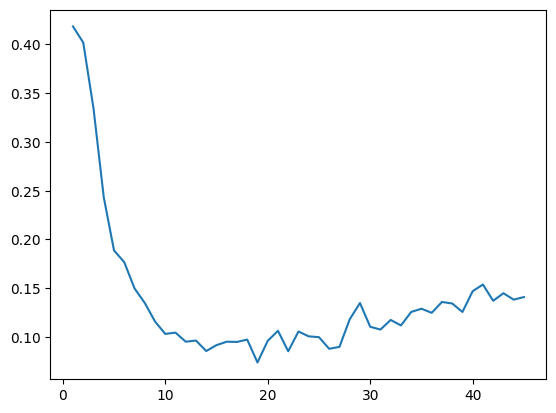

In [10]:
import matplotlib.pyplot as plt

plt.plot(emb_dims, corr_dims)
plt.show()

# Probar con resamplear el audio